In [52]:
#Objectives:
#1. Load and preprocess the dataset
#2. Inspect the data for empty values, wrong datatypes, wrong formats and duplicates and outliers
#3. Analyze the data to find patterns and relationships
#4. Visualize the data to understand dependencies
#5. Identify correlations between variables
#6. Save the cleaned and processed data.

In [53]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math


In [54]:
#Load the dataset and perform initial inspection
df = pd.read_csv("climate_action_data.csv")

#Initial inspection
print(df.info())
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [55]:
#Check for total number of misssing values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [56]:
#Handle missing value
#For categorical columns, we can fill missing values using the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0]) #Fill Nan values with mode of the column

df['Date']= df['Date'].ffill()

#Check again for missing values
print('Missing values after handling: ')
print(df.isnull().sum())


Missing values after handling: 
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [57]:
#Checking for NaN values and Erroneous cells
#print(df.isna().sum) #checking for any columns with NaN
print(df.sample(10))

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
45   SEN-1045  2025-02-15            56.38    5.95           30.8        48.1   
132  SEN-1132  2025-05-13            18.39    7.95           27.0        47.7   
443  SEN-1443  2026-03-20            35.94    7.46           20.0        87.1   
466  SEN-1466  2026-04-12             30.0    5.87           21.4        61.0   
844  SEN-1439  2026-03-16            15.69    5.15           22.3        52.3   
694  SEN-1694  2026-11-26            18.04    6.61           18.1        41.3   
224  SEN-1224  2025-08-13            28.56     7.8           28.9        52.6   
763  SEN-1763  2027-02-03            62.08    5.46           26.3        60.2   
514  SEN-1514  2026-05-30            13.17    6.08           29.1        43.5   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   

    Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
45   Tomatoes                     

In [58]:
#Data in wrong format
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Handling columns with Erroneous data values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')

#Replacing erroneous values with NaN
df.replace('error',np.nan, inplace=True)

#Check again for missing values after filling with NaN
df.isnull().sum()


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [59]:
#Wrong data
given_col = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in given_col:
    if col in df.columns:
        #Remove extreme outliers (e.g: values beyond 3 standard deviations)
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = np.where((df[col]< mean - 3*std_dev) | (df[col] > mean + 3*std_dev), np.nan, df[col]) 

#Refill NaN values in given columns with the median
        df[col] = df[col].fillna(df[col].median())

#Check data types after conversion   
print(df.dtypes)

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [60]:
#Checking for duplicates
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  111


In [61]:
#Remove duplicates
df = df.drop_duplicates()
print('Number of rows after removing duplicates: ', df.shape[0])


Number of rows after removing duplicates:  802


In [62]:
#Final clean dataset
df.info()
#Check empty values again
print('Missing values after cleaning: ')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      802 non-null    object        
 1   Date                           802 non-null    datetime64[ns]
 2   Soil_Moisture(%)               802 non-null    float64       
 3   Soil_pH                        802 non-null    float64       
 4   Temperature(C)                 802 non-null    float64       
 5   Humidity(%)                    802 non-null    float64       
 6   Crop_Type                      802 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64       
 8   Irrigation_Recommended(mm)     802 non-null    float64       
 9   Drone_Image_ID                 802 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.9+ KB
Missing values after cle

In [63]:
#Current shape of the DataSet
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (802, 10)


In [64]:
#Exploratory data analysis 
#Summary of statistics
print("Summary Statistics: ")
df.describe()

Summary Statistics: 


,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-04 01:40:32.917705728,44.766353,6.249084,26.461471,60.033292,87.460723,17.392269
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-04 12:00:00,45.230000,6.285000,26.600000,59.500000,85.950000,17.400000
75%,2026-08-22 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460694,1.021579,4.863302,17.416061,34.765497,7.140127


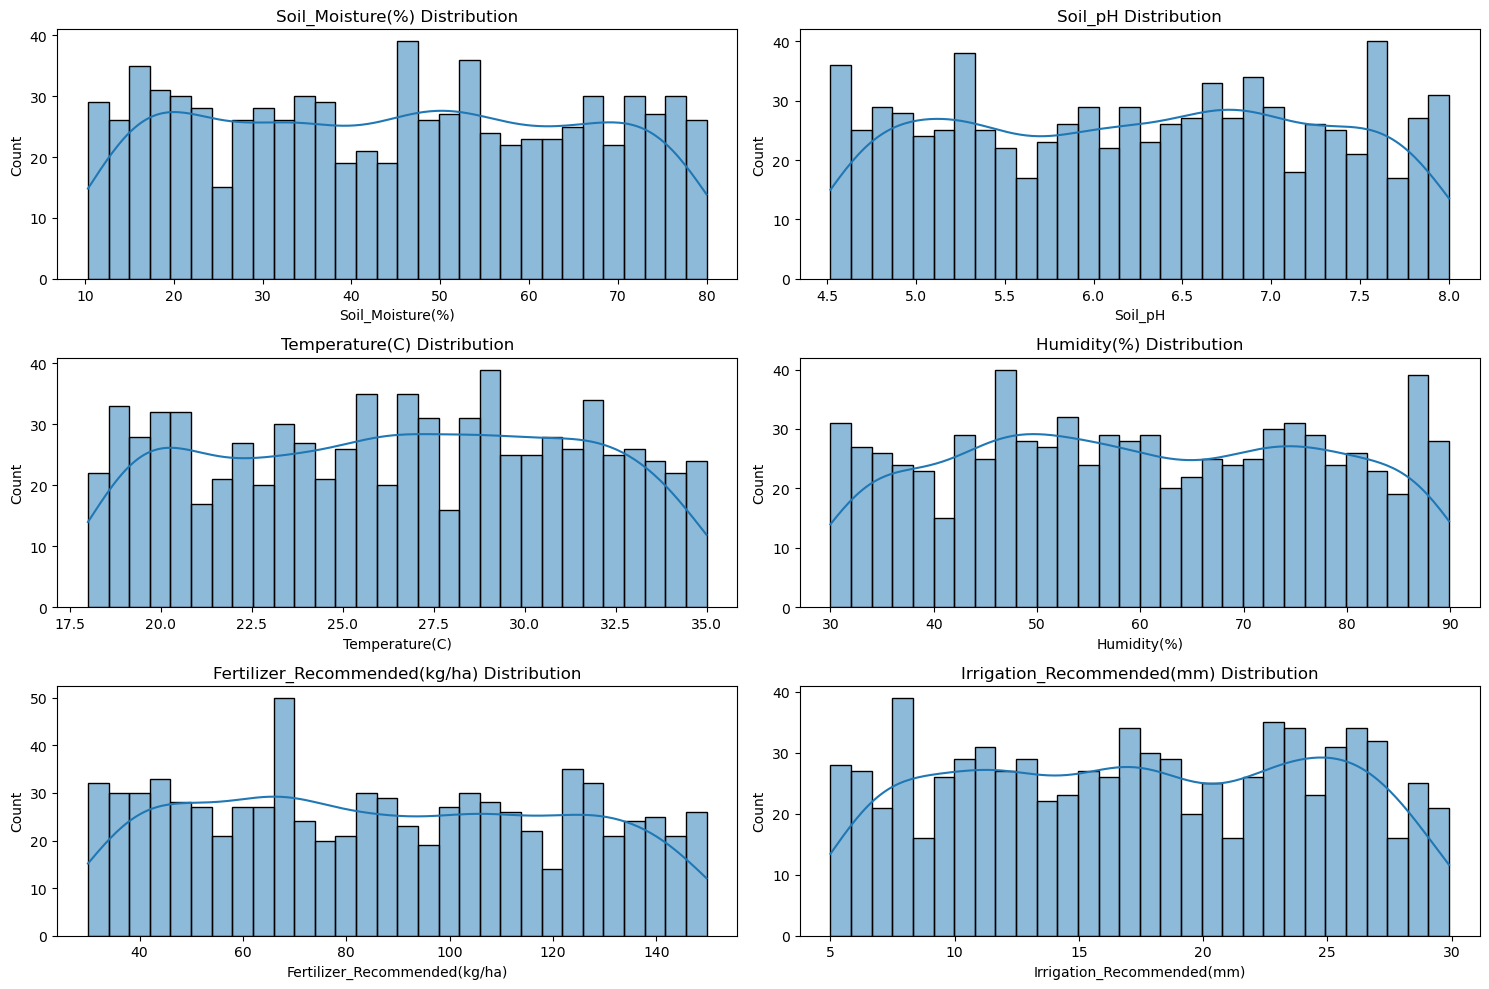

In [65]:
#Set figure size first
plt.figure(figsize=(15, 10))
#Histogram of Soil_Moisture(%)
plt.subplot(3, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Soil_Moisture(%) Distribution')

#Histogram for Soil_pH
plt.subplot(3, 2, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Soil_pH Distribution')

#Histogram for Temperature(C)
plt.subplot(3, 2, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Temperature(C) Distribution')

#Histogram for Humidity(%)
plt.subplot(3, 2, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity(%) Distribution')

#Histogram for Fertilizer_Recommended(kg/ha)
plt.subplot(3, 2, 5)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Fertilizer_Recommended(kg/ha) Distribution')

#Histogram for Irrigation_Recommended(mm)
plt.subplot(3, 2, 6)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Irrigation_Recommended(mm) Distribution')

plt.tight_layout()
plt.show()




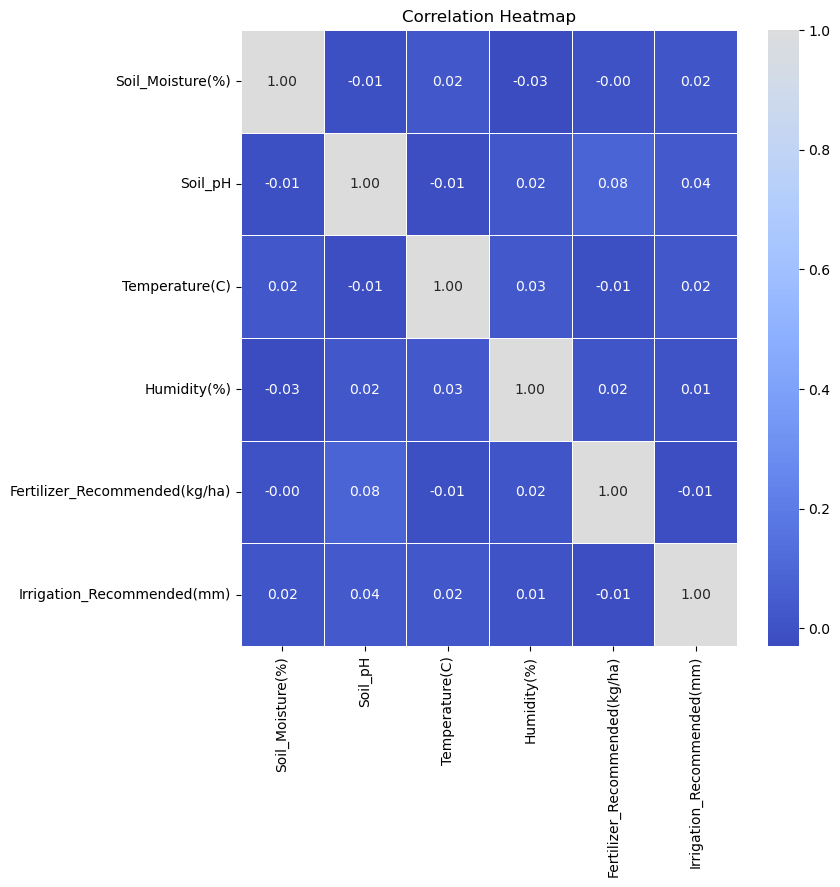

In [66]:
#Correlation HeatMap
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

#Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
#Identifying the variables that influence fertilizer recommendations

corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()
#Extracting the correlation values for 'Fertilizer_Recommended(kg/ha)'
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)']
#Sort by absolute correlation values in descending order
influential_vars = fertilizer_corr.abs().sort_values(ascending=False)
#Display the most influential variables (excluding itself)
print('Variables influencing fertilizer recommendations: ')
print(influential_vars[1:])

Variables influencing fertilizer recommendations: 
Soil_pH                       0.083666
Humidity(%)                   0.015307
Irrigation_Recommended(mm)    0.014122
Temperature(C)                0.007212
Soil_Moisture(%)              0.002762
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [68]:
#Crop type with the highest average soil moisture
#Begin by grouping crop type and finding the mean soil moisture for each crop
average_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

#Finding the crop with the highest average soil moisture
crop_highest_moisture = average_soil_moisture.idxmax() 
highest_moisture_value = average_soil_moisture.max()

print(f'The crop with the highest average soil moisture is: {crop_highest_moisture}')
print(f'Highest average soil moisture for this crop: {highest_moisture_value}')

The crop with the highest average soil moisture is: Wheat
Highest average soil moisture for this crop: 47.356448863636366


In [69]:
#Appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
#First filter rows where Temperature(C) is greater than 30
selected_crops = df[df['Temperature(C)'] > 30]
print(selected_crops)

    Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
7    SEN-1007 2025-01-08             70.63     7.74            31.6   
10   SEN-1010 2025-01-11             11.44     7.95            33.0   
16   SEN-1016 2025-01-17             31.30     6.57            34.9   
19   SEN-1019 2025-01-20             30.39     5.67            30.4   
23   SEN-1023 2025-01-24             35.65     5.89            34.3   
..        ...        ...               ...      ...             ...   
779  SEN-1779 2027-02-19             54.88     6.41            31.6   
780  SEN-1780 2027-02-20             58.58     5.31            32.0   
781  SEN-1781 2027-02-21             47.99     5.87            32.6   
782  SEN-1782 2027-02-22             27.63     6.58            33.6   
794  SEN-1794 2027-03-06             11.27     7.04            33.1   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
7           43.1   Lettuce                           41.0   
10          71.3     Maiz

In [70]:
#Grouping by Crop_Type and calculate the average irrigation recommended for each
avg_irrigation_above30 = selected_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

print('Appropriate irrigation adjustments for crops experiencing average temperatures above 30°C:')
print(avg_irrigation_above30)

Appropriate irrigation adjustments for crops experiencing average temperatures above 30°C:
Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64


In [71]:
#Creating a cleaned dataset as CSV file
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

#Insights
1. Soil pH is the most influential factor for Fertilizer recommendation.
2. Wheat has the highest average Soil moisture compared to other crops implying it retains more moisture.
3. Crops experiencing average temperatures above 30% require more irrigation
4. There are some erroneous entries which were coerced to NaN during cleaning.

##Recommendations
1. Soil moisture monitoring: since soil moisture varies widely, regular monitoring and tailored irrigation can help to maintain optimal levels for crops
2. Soil pH adjustment: Slightly acidic to neutral soil (mean pH ~6.2) is good but fields with pH below 5 may need lime treatment to raise pH.
3. Irrigation for higher temperatures: Since most crops are below 30.6C and some exceed 30C, prioritize irrigation for those hotter sites
4. Humidity considerations: Humidity variability means some areas might need adjusted irrigation strategies.
5. Investigate the data quality of all gathered variables for better data analysis.